# The DifferentialEquations Package

Various ODE solvers are implemented in the excellent `DifferentialEquations` package. They are similar to our `euler` and `rk4` functions above in the sense that they accept input arguments that define the problem as well as numerical parameters. But a major difference is that they use automatic step control. Instead of defining time steps $h$, you specify absolute and relative tolerances (`abstol` and `reltol`). If needed, the solution can be interpolated to arbitrary time values. 

We demonstrate the package using the pendulum problem from above. The definition of the right-hand side is similar to before, except the order of the arguements is different and it also accepts an argument `p` with (optional) paramters. The initial condition is again simply a vector of values.

In [1]:
# Uncomment below if the package is not already installed
#using Pkg; Pkg.add("DifferentialEquations") 

In [2]:
using DifferentialEquations, PyPlot
f(y,p,t) = [y[2], -sin(y[1])]
y0 = [2.5, 0]

2-element Vector{Float64}:
 2.5
 0.0

Next we specify the initial time $t_0$ and the final time $T$ as a tuple of two values. Note again that we do not set any time steps, only the interval of the solution:

In [3]:
tspan = (0.0, 10.0)

(0.0, 10.0)

Now we can create a so-called `ODEProblem` and solve using specified accuracy tolerances:

In [4]:
prob = ODEProblem(f, y0, tspan)
sol = solve(prob, abstol=1e-8, reltol=1e-8);

The resulting solution variable `sol` can now be viewed in various ways. For example, the actual numerical time steps are available in the array `sol.t`, and the corresponding solution values in the array `sol.u`:

In [5]:
display(hcat(sol.t, collect(sol.u)))

51×2 Matrix{Any}:
  0.0        [2.5, 0.0]
  0.0421484  [2.49947, -0.0252307]
  0.151258   [2.49314, -0.0908002]
  0.297367   [2.47338, -0.180062]
  0.458322   [2.43626, -0.281938]
  0.645056   [2.37206, -0.407205]
  0.847127   [2.27514, -0.554271]
  1.05526    [2.14272, -0.720961]
  1.26012    [1.97682, -0.901318]
  1.4608     [1.777, -1.09215]
  1.65596    [1.545, -1.28603]
  1.8471     [1.28108, -1.47433]
  2.03723    [0.98405, -1.64609]
  ⋮          
  7.90218    [0.302029, 1.87397]
  8.08321    [0.634695, 1.79243]
  8.26649    [0.951896, 1.6621]
  8.46039    [1.25784, 1.4893]
  8.67919    [1.56035, 1.27404]
  8.86474    [1.77959, 1.08983]
  9.06405    [1.97773, 0.900386]
  9.2614     [2.13801, 0.726442]
  9.47044    [2.27203, 0.558541]
  9.68941    [2.37662, 0.399355]
  9.92391    [2.45179, 0.244003]
 10.0        [2.46853, 0.196093]

But in practice it is more likely that you want to evaluate the numerical solution at arbitrary times. The differential equation package allows you to *interpolate* by simply using the `sol` variable as a function:

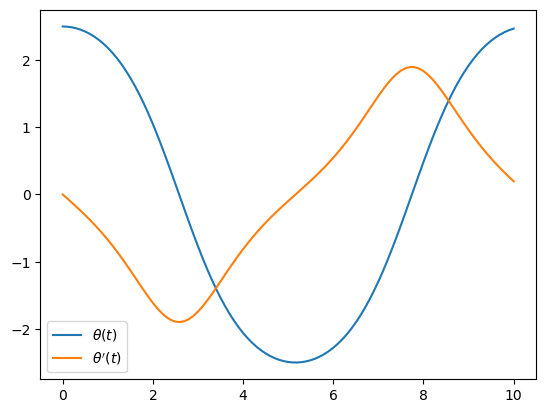

In [6]:
tt = 0:0.1:10
plot(tt, sol.(tt));
legend(("\$\\theta(t)\$", "\$\\theta'(t)\$"));

## Continuous events

Another important feature in the differential equation package is the support for *events*. These can be used to e.g. change the solution when certain conditions are satisfied, or to end the simulation.

As an example, suppose we want to find the period of the pendulum from before. This is a non-trivial problem, but numerically we can find it by telling the ODE solver to stop when $\theta'(t)=0$. This will give the (first) time instance that the pendulum turns, which corresponds to half the period.

A so-called *continuous event* is specified as a condition, and the event will be triggered when the condition is zero. In our case, the condition is simply $\theta'$, or the second component or our solution vector:

In [7]:
condition(y, t, integrator) = y[2]

condition (generic function with 1 method)

Next we specify when the solver should do when the condition is satisfied. We want to stop the simulation, which can be done with the `terminate!` function:

In [8]:
affect!(integrator) = terminate!(integrator)

affect! (generic function with 1 method)

Finally we define a so-called `ContinuousCallback` and pass it to the solve, and obtain the half period as the final time instance:

In [9]:
cb = ContinuousCallback(condition, affect!)
sol = solve(prob, callback=cb, abstol=1e-8, reltol=1e-8)
println("Period = $(2sol.t[end])")

Period = 10.323162865454835
